In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, normalize,StandardScaler
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
#labels = 'Year_Birth',	'Education',	'Marital_Status',	Income	Kidhome	Teenhome	Dt_Customer	Recency	MntWines	'
feature_names = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']
target = 'Kidhome'

df = pd.read_csv('./marketing_campaign.csv',delimiter='\t')[feature_names + [target]]
le_all = {}
for i in ['Education', 'Marital_Status']:
    le_all[i] = LabelEncoder()
    le_all[i].fit(df[i].unique())
    df[i] = le_all[i].transform(df[i])

df = df.dropna()

X_ = df.drop([target],axis=1)
Y_ = df[target].astype(int)


print('original shapes:', X_.shape, Y_.shape)

# normalize

for i in ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']:
    X_[i] = normalize([X_[i]]).reshape(X_[i].shape)

X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.25)

print('train shapes:', X_train.shape, y_train.shape)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 


original shapes: (2216, 10) (2216,)
train shapes: (1662, 10) (1662,)


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model =  keras.Sequential()
model.add(layers.Dense(200, activation='relu', input_shape=(10,)))
model.add(layers.Dense(900, activation='relu'))
model.add(layers.Dense(900, activation='relu'))
model.add(layers.Dense(900, activation='tanh'))
model.add(layers.Dense(1, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',   optimizer='adam', metrics=['accuracy'])


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 200)               2200      
                                                                 
 dense_23 (Dense)            (None, 900)               180900    
                                                                 
 dense_24 (Dense)            (None, 900)               810900    
                                                                 
 dense_25 (Dense)            (None, 900)               810900    
                                                                 
 dense_26 (Dense)            (None, 1)                 901       
                                                                 
Total params: 1,805,801
Trainable params: 1,805,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,  
                    batch_size=64,                                   
                    validation_split=0.2,
                    verbose = 2)

Epoch 1/10
21/21 - 1s - loss: 0.0000e+00 - accuracy: 0.3875 - val_loss: 0.0000e+00 - val_accuracy: 0.4384 - 1s/epoch - 65ms/step
Epoch 2/10
21/21 - 1s - loss: 0.0000e+00 - accuracy: 0.3875 - val_loss: 0.0000e+00 - val_accuracy: 0.4384 - 633ms/epoch - 30ms/step
Epoch 3/10
21/21 - 1s - loss: 0.0000e+00 - accuracy: 0.3875 - val_loss: 0.0000e+00 - val_accuracy: 0.4384 - 634ms/epoch - 30ms/step
Epoch 4/10
21/21 - 1s - loss: 0.0000e+00 - accuracy: 0.3875 - val_loss: 0.0000e+00 - val_accuracy: 0.4384 - 612ms/epoch - 29ms/step
Epoch 5/10
21/21 - 1s - loss: 0.0000e+00 - accuracy: 0.3875 - val_loss: 0.0000e+00 - val_accuracy: 0.4384 - 843ms/epoch - 40ms/step
Epoch 6/10
21/21 - 1s - loss: 0.0000e+00 - accuracy: 0.3875 - val_loss: 0.0000e+00 - val_accuracy: 0.4384 - 761ms/epoch - 36ms/step
Epoch 7/10
21/21 - 1s - loss: 0.0000e+00 - accuracy: 0.3875 - val_loss: 0.0000e+00 - val_accuracy: 0.4384 - 591ms/epoch - 28ms/step
Epoch 8/10
21/21 - 1s - loss: 0.0000e+00 - accuracy: 0.3875 - val_loss: 0.0000e

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

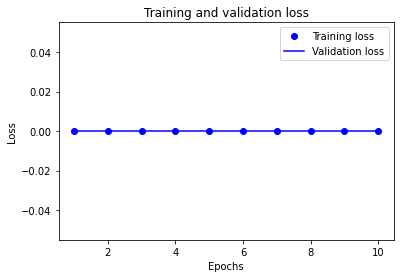

In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.0
Test accuracy: 0.4079422354698181


Схоже подібний тип класифікації вдається гірше нейронній мережі, ніж більш простим алгоритмам.

# CNN

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

rescaled = ImageDataGenerator(1/255)
train_fed = tf.keras.utils.image_dataset_from_directory('seg_train/seg_train', image_size = (128,128), batch_size=32, label_mode = 'categorical', subset='training', validation_split = 0.2, seed=42)
test_fed = tf.keras.utils.image_dataset_from_directory('seg_test/seg_test', image_size = (128,128), batch_size=32, label_mode = 'categorical', subset='validation', validation_split = 0.2, seed=42)


Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 3000 files belonging to 6 classes.
Using 600 files for validation.


In [36]:
model = tf.keras.models.Sequential()

model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),)
model.add(layers.Conv2D(16, (3,3), activation='relu'),)
model.add(layers.Conv2D(16, (3,3), activation='relu'),)
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
model.add(layers.LeakyReLU(alpha=0.02))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
model.add(layers.LeakyReLU(alpha=0.02))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Flatten(),)
model.add(layers.Dense(128, activation='relu'),)
model.add(layers.Dense(6, activation='softmax')     )


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 conv2d_10 (Conv2D)          (None, 124, 124, 16)      2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 62, 62, 64)        9280      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                  

In [ ]:
hist = model.fit(train_fed, epochs=10, validation_data=test_fed, callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)], verbose=1)

In [ ]:
acc = model.evaluate(test_fed, steps=len(test_fed), verbose=1)
print('%.2f'%(acc[1]*100))

# RNN

In [3]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [4]:
f_news = pd.read_csv('Fake.csv')
t_news = pd.read_csv('True.csv')

f_news['target']=0
t_news['target']=1

data = pd.concat([f_news,t_news])

In [5]:
data = data.drop(columns=['title','subject','date'])

data['text'] = data['text'].apply(lambda s: s.lower())
data.head()

,text,target
0,donald trump just couldn t wish all americans ...,0
1,house intelligence committee chairman devin nu...,0
2,"on friday, it was revealed that former milwauk...",0
3,"on christmas day, donald trump announced that ...",0
4,pope francis used his annual christmas day mes...,0


In [6]:
x = data['text']

y = data['target']

In [ ]:
token = Tokenizer(num_words=10000,oov_token="<OOV>")
token.fit_on_texts(x)
word_index = token.word_index
train_seq = token.texts_to_sequences(x)
train_padd = pad_sequences(train_seq,padding="post",truncating="post",maxlen=50)


In [10]:

x_train,x_test,y_train,y_test = train_test_split(train_padd,y , test_size=0.5,train_size=0.5)

In [11]:
model = keras.Sequential()
model.add(layers.Embedding(10000, 128))
model.add(layers.LSTM(128))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [12]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test,y_test), verbose = 1)

Epoch 1/5
702/702 [==============================] - 102s 141ms/step - loss: 0.0891 - accuracy: 0.9731 - val_loss: 0.0858 - val_accuracy: 0.9812
Epoch 2/5
702/702 [==============================] - 95s 135ms/step - loss: 0.0637 - accuracy: 0.9865 - val_loss: 0.0595 - val_accuracy: 0.9898
Epoch 3/5
702/702 [==============================] - 96s 136ms/step - loss: 0.0968 - accuracy: 0.9608 - val_loss: 0.6334 - val_accuracy: 0.6702
Epoch 4/5
702/702 [==============================] - 94s 134ms/step - loss: 0.1469 - accuracy: 0.9484 - val_loss: 0.0659 - val_accuracy: 0.9820
Epoch 5/5
702/702 [==============================] - 96s 136ms/step - loss: 0.0740 - accuracy: 0.9818 - val_loss: 0.0487 - val_accuracy: 0.9863


In [14]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.04874517396092415
Test accuracy: 0.9863245487213135
